# Accessing ZDF data files with Python

Access to ZDF data with Python requires importing the __zdf__ module

In [116]:
import zdf

You can list the contents of ZDF files using the __list__ command:

In [117]:
myfile_CHARGE = "../es1d/CHARGE/charge density-000010.zdf"
myfile_PARTICLE = "../es1d/PARTICLES/beam1/particles-beam1-000050.zdf"
zdf.list(myfile_CHARGE)

Position     Size(bytes)  Type         Name
-----------------------------------------------------
0x00000004   0x00000008   string       TYPE
0x00000020   0x00000060   grid_info    charge density
0x000000a0   0x0000001c   iteration    ITERATION
0x000000d8   0x00000114   dataset      charge density


File metadata can be retrieved using the `info` command:

In [94]:
info = zdf.info(myfile_CHARGE)
print("File information:")
print(info.__dict__)

File information:
{'type': 'grid', 'grid': <zdf.ZDF_Grid_Info object at 0x10fc027a0>, 'particles': None, 'tracks': None, 'iteration': <zdf.ZDF_Iteration object at 0x12b48c130>}


The `ZDF_Info` object has the following fields:

* type - String specifying the file type (grid, particles or tracks)
* grid - Instance of `ZDF_Grid_Info` object for grid files
* particles - Instance of `ZDF_Part_Info` object for particle files
* tracks - Instance of `ZDF_Tracks_Info` object for tracks files
* iteration - Instance of `ZDF_Iteration` object (except for tracks files)

See the [`zdf.py`](zdf.py) file for details on all of the objects. For example, the iteration metadata is:

In [95]:
print( "File iteration information:" )
print( info.iteration.__dict__ )

File iteration information:
{'name': 'ITERATION', 'n': 10, 't': 2.5, 'tunits': '1/\\omega_p'}


## Grid data

For all types of ZDF files, data (and metadata) can be read using the `read` command

In [96]:
(data,info) = zdf.read(myfile_CHARGE)

For a grid data file, `data` is a NumPy ndarray, `info` is a `ZDF_Info` object with all the metadata as described above. The grid specific metadata will be in the `info.grid` field:

In [97]:
print( "File grid information:" )
print( info.grid.__dict__ )

File grid information:
{'name': 'charge density', 'ndims': 1, 'nx': array([120], dtype=uint64), 'label': '\\rho', 'units': 'e \\omega_p^2 / c', 'has_axis': 1, 'axis': [<zdf.ZDF_Grid_Axis object at 0x12f2a2860>]}


If the grid file contains axis information (`has_axis` field), there will be a grid axis object for each dimension with information on the axis:

In [98]:
print( "File grid axis information:" )
print( info.grid.axis[0].__dict__ )

File grid axis information:
{'name': 'x', 'type': 0, 'min': 0.0, 'max': 1.5707963705062866, 'label': 'x', 'units': 'c/\\omega_p'}


## Particle data

Similarly, to read the data (and metadata) in a particle data file you should use the same `read` command:

In [99]:
(particles,info) = zdf.read(myfile_PARTICLE)

`particles` is a dictionary with one entry per particle quantity available, where each entry is a numpy ndarray. `info` is a `ZDF_Info` object with all the metadata as described above. The particle specific metadata will be in the `info.particles` field:

In [100]:
print("Particle data:")
for i in particles.items():
    print("->",i)
    
print("\nParticle information:")
print( info.particles.__dict__ )

Particle data:
-> ('x', array([0.01384138, 0.01370209, 0.01845858, ..., 0.00870303, 0.00985396,
       0.01306725], dtype=float32))
-> ('vx', array([0.02731682, 0.02720704, 0.02748402, ..., 0.0264101 , 0.02649908,
       0.02661516], dtype=float32))

Particle information:
{'name': 'beam1', 'label': 'beam1', 'nquants': 2, 'quants': ['x', 'vx'], 'qlabels': {'x': 'x', 'vx': 'v_x'}, 'qunits': {'x': 'c/\\omega_p', 'vx': 'c'}, 'nparts': 60000}


## Plotting with Matplotlib

You can easily use the data read from files to plot your data with any of your favorite tools. The additional metadata present on ZDF files allows you to create a properly formatted plot automatically including:
* Plot labels
* Axis labels
* Time information

ZDF metadata always includes units information for all relevant quantities, so you can also add these automatically to your plots. 

Below are examples for plotting ZDF data using Matplotlib.

### 1D Grid data plot

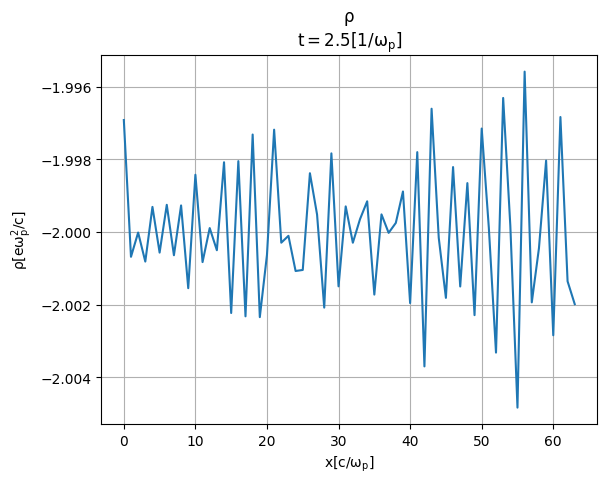

In [115]:
import matplotlib.pyplot as plt

# Read data and metadata
(data,info) = zdf.read(myfile_CHARGE)

plt.plot(data)

# Set x label from x axis label and units
xlabel = info.grid.axis[0].label + ' [' + info.grid.axis[0].units + ']'

# Set y label from grid label and units
ylabel = info.grid.label +' [' + info.grid.units + ']'

# Set plot title from grid label
title = info.grid.label

# Set time label from iteration time and units
timeLabel = 't = ' + str( info.iteration.t ) + ' ['+info.iteration.tunits + ']'

plt.title(r'$\sf{' + title + r'}$' + '\n' + r'$\sf{'+ timeLabel+ r'}$')

plt.xlabel(r'$\sf{' +xlabel+ r'}$')
plt.ylabel(r'$\sf{' +ylabel+ r'}$')

plt.grid(True)
plt.show()

## 2D grid data plot

TypeError: Invalid shape (120,) for image data

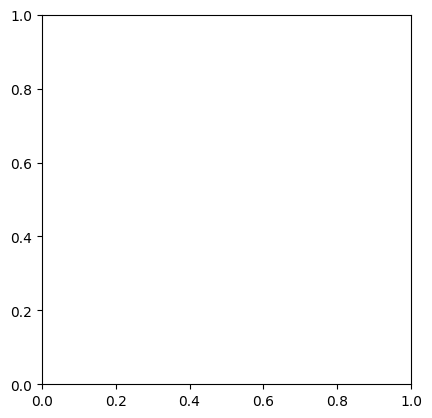

In [102]:
import matplotlib.pyplot as plt
import numpy as np

(data,info) = zdf.read(myfile_CHARGE)


plt.imshow( data, cmap = "Spectral", vmin = -1.5, vmax = 1.5, interpolation = 'nearest', origin = 'lower')

# Set z label from grid label and units
zlabel = info.grid.label +' [' + info.grid.units + ']'
plt.colorbar().set_label(r'$\sf{' +zlabel+ r'}$')

# Set plot title from grid label
title = info.grid.label

# Set time label from iteration time and units
timeLabel = 't = ' + str( info.iteration.t ) + ' ['+info.iteration.tunits + ']'

plt.title(r'$\sf{' + title + r'}$' + '\n' + r'$\sf{'+ timeLabel+ r'}$')

# Set x label from x axis label and units
xlabel = info.grid.axis[0].label + ' [' + info.grid.axis[0].units + ']'
# Set y label from y axis label and units
ylabel = info.grid.axis[1].label + ' [' + info.grid.axis[1].units + ']'

plt.xlabel(r'$\sf{' +xlabel+ r'}$')
plt.ylabel(r'$\sf{' +ylabel+ r'}$')

plt.grid(True)

plt.show()


### Plotting particle data

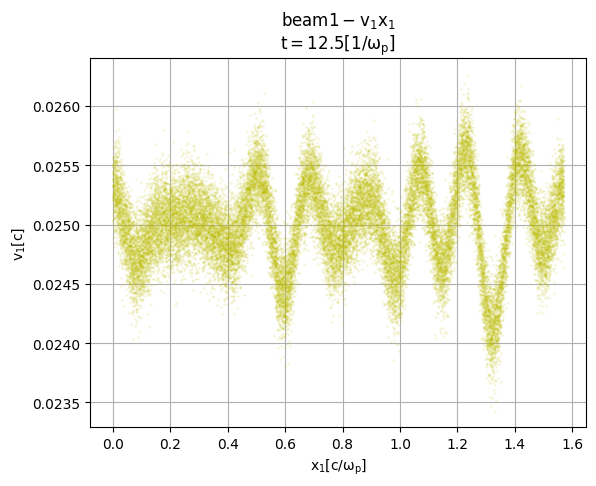

In [105]:
import matplotlib.pyplot as plt

(particles,info) = zdf.read(myfile_PARTICLE)

# x data will be particle position x1
x = particles['x']
# y data will be particle velocity v1
y = particles['vx']

plt.plot(x, y, 'y.', ms=2,alpha=0.1)

# Get iteration time and units
t = str(info.iteration.t)
tunits = str(info.iteration.tunits)

# Set title from particles name
title = info.particles.name + '-  v_1 x_1'

timeLabel = r'$\sf{t = ' + t + ' [' + tunits + r']}$'
plt.title(r'$\sf{' + title + r'}$' + '\n' + timeLabel)

# Include units information in the axis labels
xlabel = 'x_1' + '[' + info.particles.qunits['x'] + ']'
ylabel = 'v_1' + '[' + info.particles.qunits['vx'] + ']'

plt.xlabel(r'$\sf{' + xlabel + r'}$')
plt.ylabel(r'$\sf{' + ylabel + r'}$')

plt.grid(True)

plt.show()